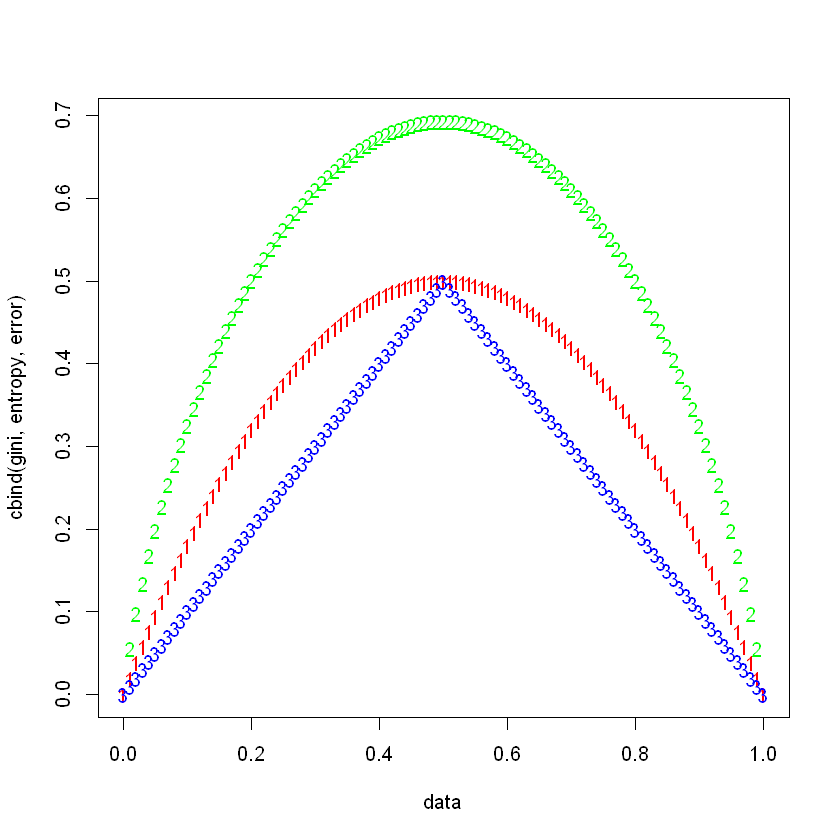

In [2]:
#chapter 8 ex 3
data <- seq(0, 1, 0.01)
gini <- data * (1 - data) * 2
entropy <- -(data * log(data) + (1 - data) * log(1 - data))
error <- 1 - pmax(data, 1 - data)
matplot(data, cbind(gini, entropy, error), col = c("red", "green", "blue"))

In [5]:
#chapter 8 exercise 5
p <- c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)
#majority vote at 0.5
sum(p >= 0.5) > sum(p < 0.5)
#the number of red predictions is higher than green predictions

#average approach 
mean(p)
#the number of red prediction is lower than green predictions

[1] TRUE

[1] 0.45

In [15]:
#chapter 8 exericse 8

library(ISLR)
attach(Carseats)
set.seed(123)

#a) train and test split 
train = sample(dim(Carseats)[1], dim(Carseats)[1]/2)
train_carseats = Carseats[train, ]
test_carseats = Carseats[-train, ]


The following objects are masked from Carseats (pos = 3):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 4):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 5):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 6):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 7):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following objects are masked from Carseats (pos = 9):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


The following ob


Regression tree:
tree(formula = Sales ~ ., data = train_carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "Age"         "Population" 
[6] "Education"   "CompPrice"   "Advertising"
Number of terminal nodes:  18 
Residual mean deviance:  2.132 = 388.1 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.08000 -0.92870  0.06244  0.00000  0.87020  3.71700 

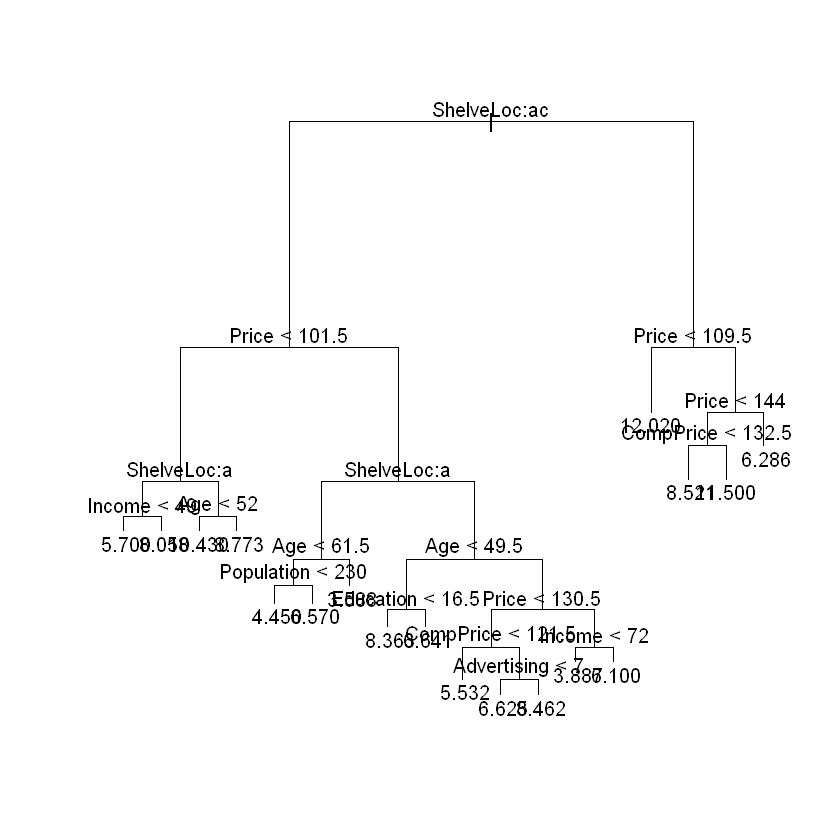

In [30]:
#b) fitting regression tree to the training set 
library(tree)
carseats_tree = tree(Sales ~ ., data = train_carseats)
summary(carseats_tree)
plot(carseats_tree)
text(carseats_tree)

In [38]:
carseats_pred = predict(carseats_tree, test_carseats)
mean((test_carseats$Sales - carseats_pred)^2)

[1] 4.395357

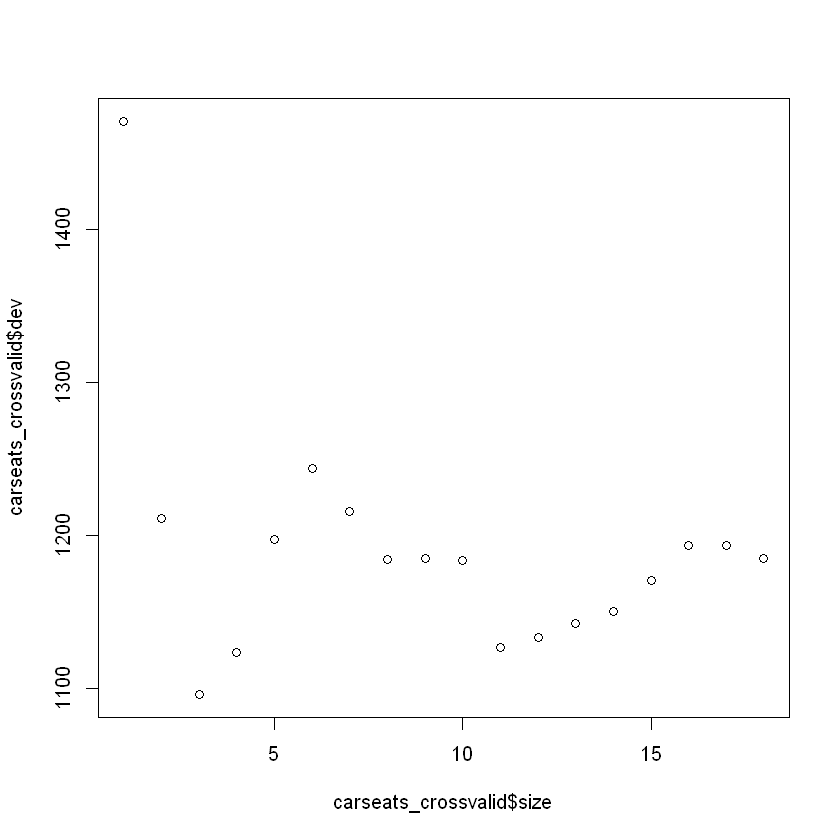

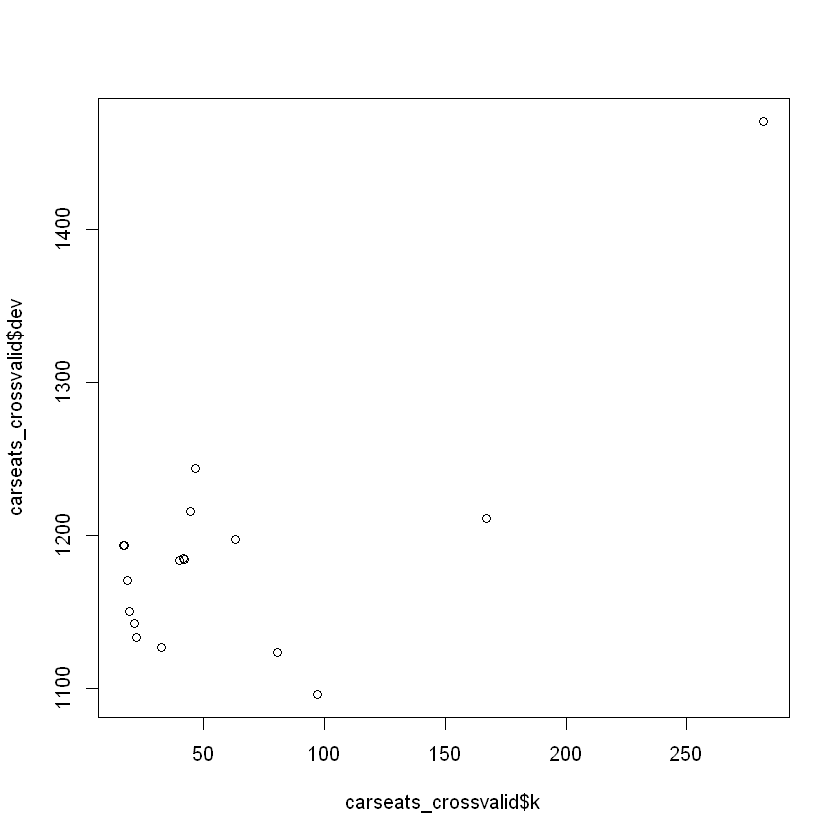

In [28]:
#c) cross-validation 
carseats_crossvalid = cv.tree(carseats_tree, FUN = prune.tree)
plot(carseats_crossvalid$size, carseats_crossvalid$dev)
plot(carseats_crossvalid$k, carseats_crossvalid$dev)

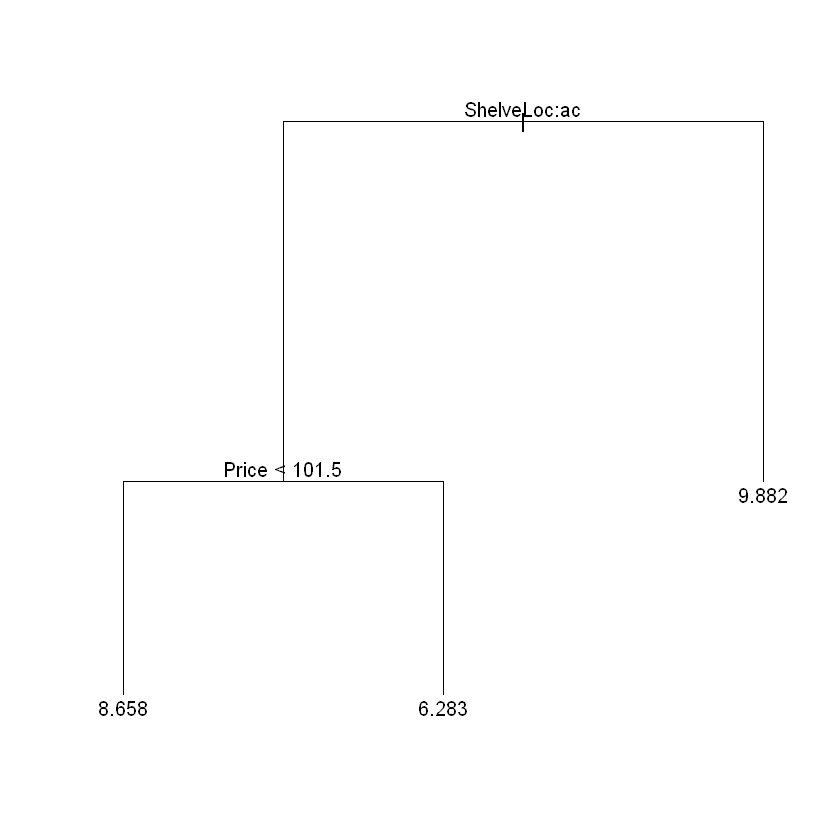

In [29]:
# according to the graph the best number of branching is 3
carseats_pruned = prune.tree(carseats_tree, best = 3)
par(mfrow = c(1, 1))
plot(carseats_pruned)
text(carseats_pruned)

In [36]:
pruned_pruned = predict(carseats_pruned, test_carseats)
mean((test_carseats$Sales - pruned_pruned)^2)


[1] 5.686081

In [41]:
#d) bagging
library(randomForest)
carseats_bag = randomForest(Sales ~ ., data = train_carseats, mtry = 10, ntree = 500, importance = T)
pred_bagging = predict(carseats_bag, test_carseats)
mean((test_carseats$Sales - pred_bagging)^2)

[1] 2.765567

In [42]:
#e)
carseats_rf = randomForest(Sales ~ ., data = train_carseats, mtry = 5, ntree = 500, importance = T)
pred_rf = predict(carseats_rf, test_carseats)
mean((test_carseats$Sales - pred_rf)^2)
importance(carseats_rf)


[1] 3.033842

,%IncMSE,IncNodePurity
CompPrice,17.3384020,148.12401
Income,7.2678081,109.39203
Advertising,6.4733493,87.38928
Population,-0.9945203,79.59029
Price,37.3573352,339.63015
ShelveLoc,38.5674897,330.79852
Age,17.8076199,201.58218
Education,2.4581056,64.47904
Urban,-0.7005812,10.53182
US,2.6465868,10.02450
